jh.npy → 498장 로딩 완료
총 498장 얼굴 데이터 로딩 완료 각 얼굴 크기: 10000
(50, 10000)
(498, 50)


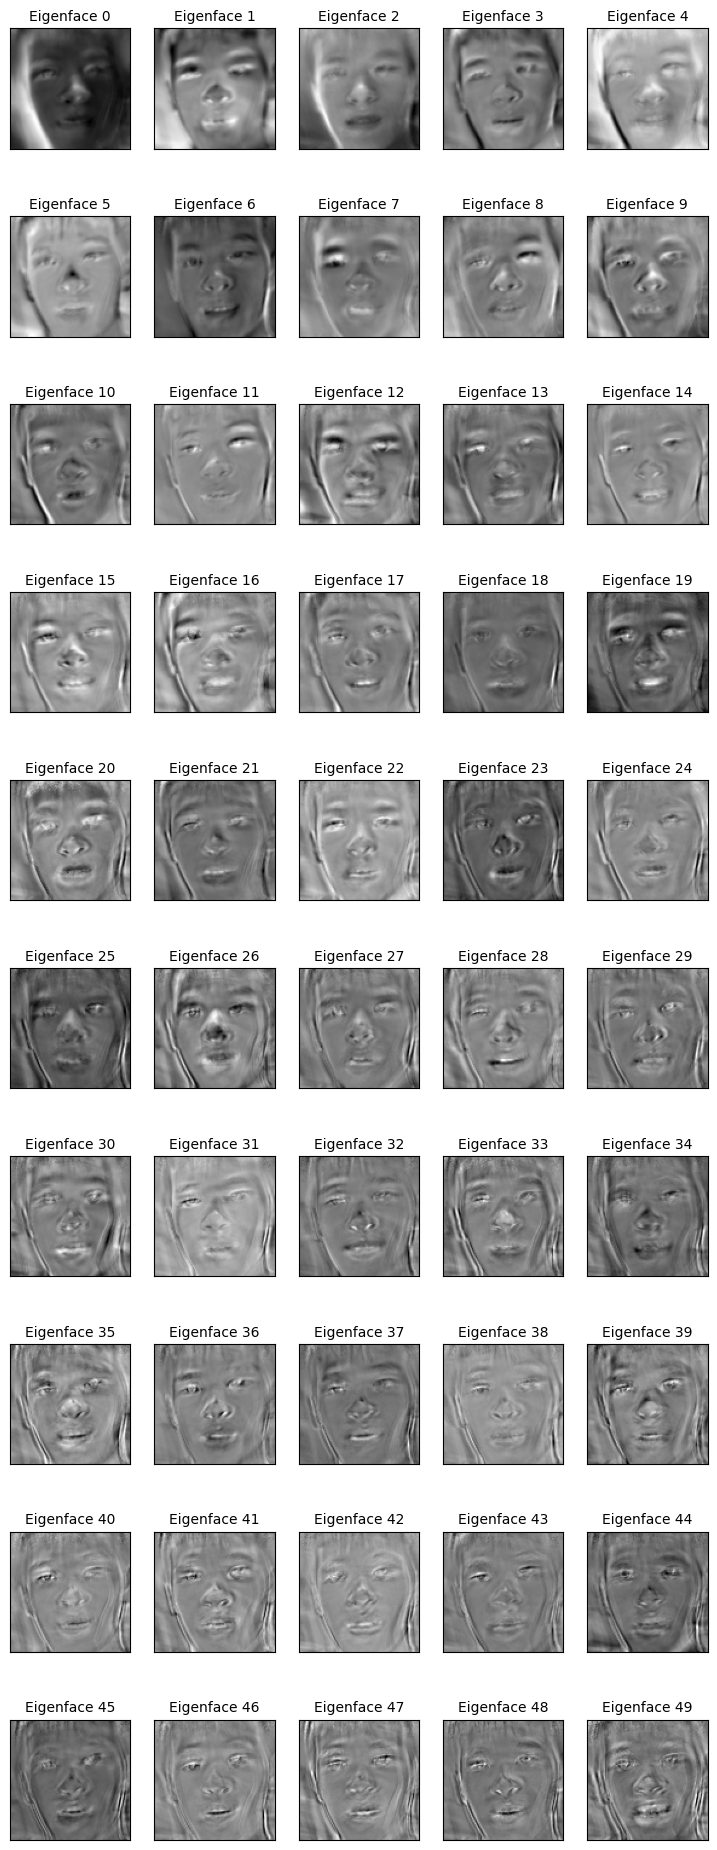

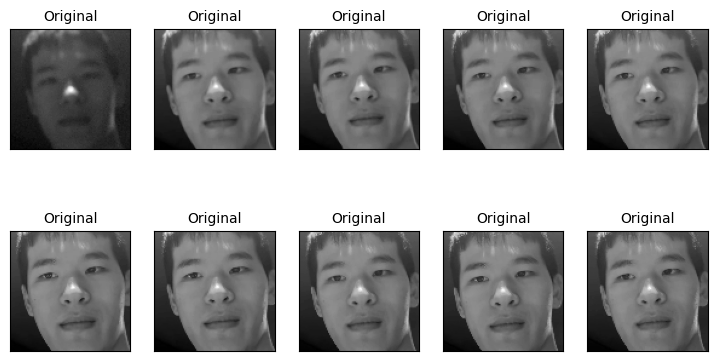

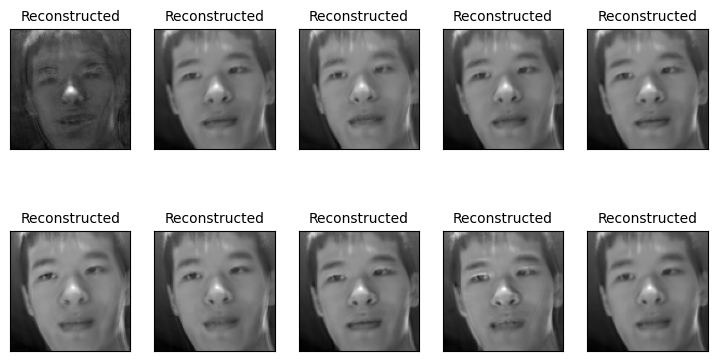

Explained Varience: 0.8846955312806418


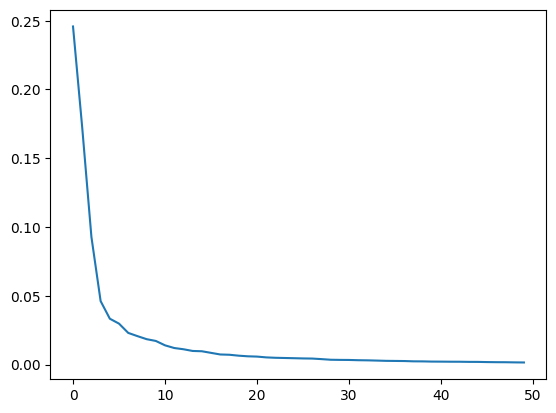

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. face_db에서 얼굴 데이터 불러오기
def load_faces_from_db(folder):
    all_faces = []
    for fname in os.listdir(folder):
        if fname.endswith(".npy"):
            data = np.load(os.path.join(folder, fname))
            all_faces.append(data)
            print(f"{fname} → {data.shape[0]}장 로딩 완료")
    return np.vstack(all_faces)  # (총얼굴수, 10000)


# def load_faces(folder, target_size=(100, 100)):
#     images = []
#     for fname in os.listdir(folder):
#         if fname.endswith(".jpg") or fname.endswith(".png"):
#             img = Image.open(os.path.join(folder, fname)).convert("L").resize(target_size)
#             images.append(np.array(img).flatten())  # (10000,)
#     return np.array(images), target_size

# image_dir = "your_folder_with_faces"  # 👈 얼굴 이미지 폴더 경로 설정
# faces_matrix, (h, w) = load_faces(image_dir)
# print("총 이미지 수:", faces_matrix.shape[0])

face_db_path = "face_db"
faces_matrix = load_faces_from_db(face_db_path)
n_samples, n_features = faces_matrix.shape
print(f"총 {n_samples}장 얼굴 데이터 로딩 완료", f"각 얼굴 크기: {n_features}")
h, w = 100, 100  # 얼굴 크기

# 2. PCA 수행
n_components = 50
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True)

pca.fit(faces_matrix)
print(pca.components_.shape)  # (40, 10000)


faces_pca = pca.transform(faces_matrix)
print(faces_pca.shape)

faces_reconstructed = pca.inverse_transform(faces_pca)

# 3. 시각화 함수
def plot_images(images, titles, h, w, n_row=2, n_col=5, cmap='gray'):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    for i in range(n_row * n_col):
        if i >= len(images): break
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=cmap)
        plt.title(titles[i], size=10)
        plt.xticks(())
        plt.yticks(())

# 4. 결과 시각화
plot_images(pca.components_, [f"Eigenface {i}" for i in range(n_components)], h, w,n_row=10, n_col=5)
plot_images(faces_matrix, ["Original"] * len(faces_matrix), h, w)
plot_images(faces_reconstructed, ["Reconstructed"] * len(faces_reconstructed), h, w)

plt.show()

print("Explained Varience: "+ str(np.sum(pca.explained_variance_ratio_)))
plt.plot(pca.explained_variance_ratio_)

/opt/anaconda3/envs/dataScience/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2, 3, 4], dtype=int32), array([ 13, 539, 157,  12,   9]))
Cluster 0: 13 faces
Cluster 1: 539 faces
Cluster 2: 157 faces
Cluster 3: 12 faces
Cluster 4: 9 faces


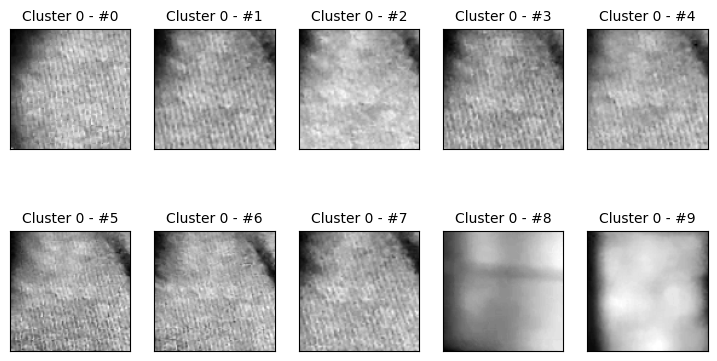

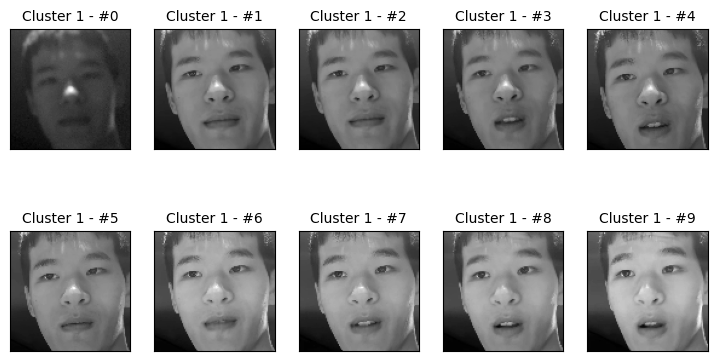

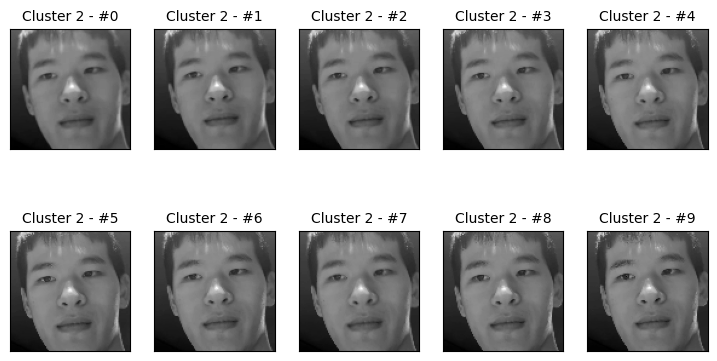

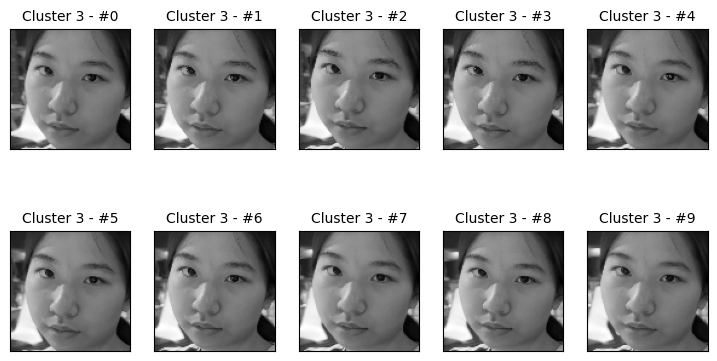

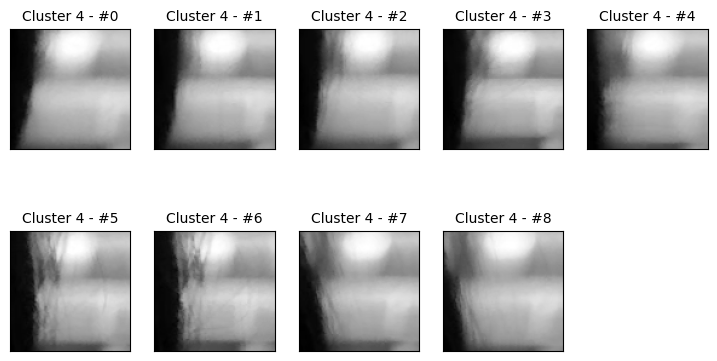

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=5, random_state=42)
km.fit(faces_pca)

print(np.unique(km.labels_, return_counts=True))

#transform code for every n cluser 



def plot_clusters(faces_matrix, labels, h, w, n_clusters=3, n_row=2, n_col=5):
    for cluster_id in range(n_clusters):
        cluster_indices = np.where(labels == cluster_id)[0]
        cluster_faces = faces_matrix[cluster_indices]
        print(f"Cluster {cluster_id}: {len(cluster_faces)} faces")
        plot_images(
            cluster_faces,
            [f"Cluster {cluster_id} - #{i}" for i in range(len(cluster_faces))],
            h, w, n_row=n_row, n_col=n_col
        )
    plt.show()

# 사용 예시
plot_clusters(faces_matrix, km.labels_, h, w, n_clusters=km.n_clusters)


#reference : https://itstory1592.tistory.com/20
